# Pandas

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [ ]:
from __future__ import print_function
import matplotlib as plt
import pandas as pd


The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

population = pd.Series([852469, 1015785, 485199])

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

population = pd.Series([852469, 1015785, 485199])

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe836e0ac18>,
      dtype=object)

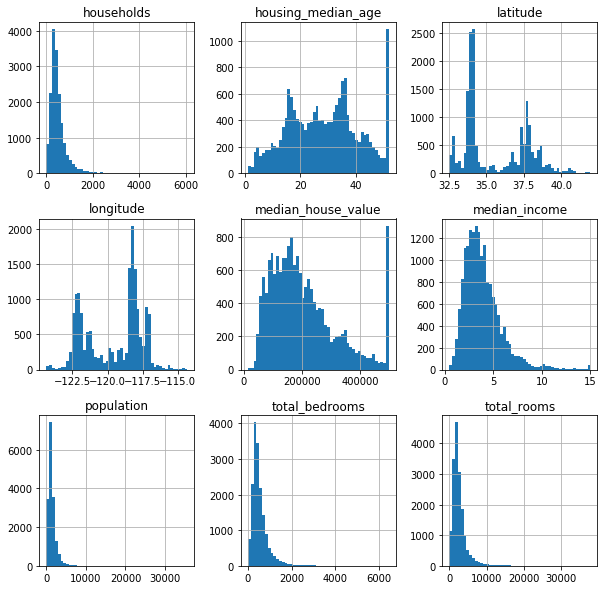

In [ ]:
housing = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

The example above used `DataFrame.describe` to show interesting statistics 

1.   List item
2.   List item

about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

population / 1000.

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

np.log(population)

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.


**Question 1**: creates a new `Series` that indicates whether `population` is over one million:


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])

and a new Series `population density` as population/area square miles.


## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [ ]:
# Your code here


### Solution

Click below for a solution.

In [ ]:
#@title
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
cities

,city names,population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [ ]:
cities.reindex([2,0,1])

,city names,population,Area square miles,Population density
2,Sacramento,485199,97.92,4955.055147
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760


Reindexing is a great way to shuffle (randomize) a `DataFrame`. 

Using `np.random.permutation` function, we can shuffle the values in place. 

Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [ ]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [ ]:
cities.reindex([0, 4, 5, 2])

This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.